# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"  # Use units=metric for Celsius
    
    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Increment the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        city_weather = requests.get(city_url).json()

        # Parse out the desired weather data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]  # Temperature is already in Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... ({e})")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | prince rupert
Processing Record 2 of Set 1 | jiuquan
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | yeraliyev
Processing Record 5 of Set 1 | posto fiscal rolim de moura
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | beihai
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | kalix
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | nadi
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | tank
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | weatherford
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | ataq
Processing Record 20 of Set 1 | mogocha
Processing Record 21 of Set 1 | klaksvik
Processing Record 22 of Set 1 | west island
Processing 

Processing Record 37 of Set 4 | lebu
Processing Record 38 of Set 4 | fort st. john
Processing Record 39 of Set 4 | bardai
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | escanaba
Processing Record 42 of Set 4 | takoradi
Processing Record 43 of Set 4 | penzance
Processing Record 44 of Set 4 | ostrow wielkopolski
Processing Record 45 of Set 4 | at taj
Processing Record 46 of Set 4 | namtsy
Processing Record 47 of Set 4 | puerto colombia
Processing Record 48 of Set 4 | remire-montjoly
Processing Record 49 of Set 4 | sinj
Processing Record 0 of Set 5 | lerwick
Processing Record 1 of Set 5 | alesund
Processing Record 2 of Set 5 | sainte-anne-des-monts
Processing Record 3 of Set 5 | cargados carajos
City not found. Skipping... ('coord')
Processing Record 4 of Set 5 | langsa
Processing Record 5 of Set 5 | wailua homesteads
Processing Record 6 of Set 5 | karagay
Processing Record 7 of Set 5 | klyuchi
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 |

Processing Record 26 of Set 8 | 'ohonua
City not found. Skipping... ('coord')
Processing Record 27 of Set 8 | zheleznodorozhnyy
Processing Record 28 of Set 8 | pariaman
Processing Record 29 of Set 8 | general roca
Processing Record 30 of Set 8 | kavieng
Processing Record 31 of Set 8 | oamaru
Processing Record 32 of Set 8 | uturoa
Processing Record 33 of Set 8 | alaghsas
Processing Record 34 of Set 8 | galesong
Processing Record 35 of Set 8 | selkirk
Processing Record 36 of Set 8 | port lincoln
Processing Record 37 of Set 8 | beau vallon
Processing Record 38 of Set 8 | ban phe
City not found. Skipping... ('coord')
Processing Record 39 of Set 8 | ikom
Processing Record 40 of Set 8 | tagta
Processing Record 41 of Set 8 | sitka
Processing Record 42 of Set 8 | rikaze
Processing Record 43 of Set 8 | macau
Processing Record 44 of Set 8 | seogwipo
City not found. Skipping... ('coord')
Processing Record 45 of Set 8 | mili
Processing Record 46 of Set 8 | poronaysk
Processing Record 47 of Set 8 |

Processing Record 15 of Set 12 | haiku-pauwela
Processing Record 16 of Set 12 | uray
Processing Record 17 of Set 12 | namdrik
Processing Record 18 of Set 12 | el paso
Processing Record 19 of Set 12 | ambodifotatra
Processing Record 20 of Set 12 | pampa
Processing Record 21 of Set 12 | fannuj
City not found. Skipping... ('coord')
Processing Record 22 of Set 12 | nagqu
Processing Record 23 of Set 12 | aykhal
Processing Record 24 of Set 12 | catalina foothills
Processing Record 25 of Set 12 | bangjun
Processing Record 26 of Set 12 | astrakhan
Processing Record 27 of Set 12 | mount pearl
Processing Record 28 of Set 12 | zakamensk
Processing Record 29 of Set 12 | carloforte
Processing Record 30 of Set 12 | choibalsan
Processing Record 31 of Set 12 | mranggen
Processing Record 32 of Set 12 | bani walid
Processing Record 33 of Set 12 | abraham's bay
City not found. Skipping... ('coord')
Processing Record 34 of Set 12 | pokhara
Processing Record 35 of Set 12 | rukungiri
Processing Record 36 of

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,prince rupert,54.3161,-130.3201,12.05,96,100,4.12,CA,1695835399
1,jiuquan,39.7432,98.5174,14.29,25,4,3.01,CN,1695835400
2,edinburgh of the seven seas,-37.0676,-12.3116,11.54,72,46,12.71,SH,1695835400
3,yeraliyev,43.2000,51.6500,21.07,38,0,3.05,KZ,1695835401
4,posto fiscal rolim de moura,-13.0833,-62.2667,40.42,21,34,1.98,BR,1695835401


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\jahn_\\Documents\\UofT\\GitHub\\Data-Analytics-Boot-Camp\\Module_6_API_Challenge\\Output_data\\cities.csv", index_label="City_ID")


In [40]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\jahn_\\Documents\\UofT\\GitHub\\Data-Analytics-Boot-Camp\\Module_6_API_Challenge\\Output_data\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,prince rupert,54.3161,-130.3201,12.05,96,100,4.12,CA,1695835399
1,jiuquan,39.7432,98.5174,14.29,25,4,3.01,CN,1695835400
2,edinburgh of the seven seas,-37.0676,-12.3116,11.54,72,46,12.71,SH,1695835400
3,yeraliyev,43.2000,51.6500,21.07,38,0,3.05,KZ,1695835401
4,posto fiscal rolim de moura,-13.0833,-62.2667,40.42,21,34,1.98,BR,1695835401


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

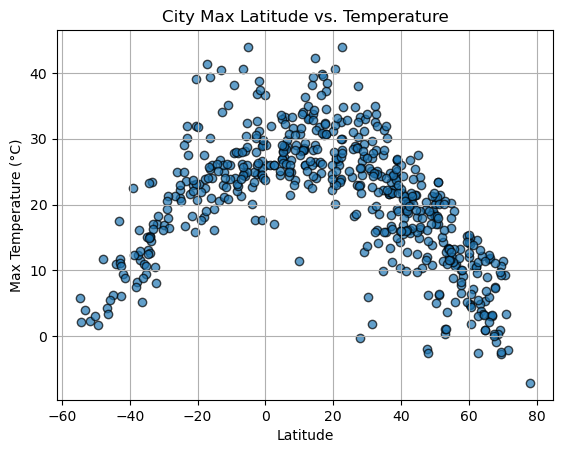

In [43]:
# Build scatter plot for Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.7)

# Set title and labels
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\jahn_\\Documents\\UofT\\GitHub\\Data-Analytics-Boot-Camp\\Module_6_API_Challenge\\Output_data\\Fig1.png")

# Show the plot
plt.show()


#### Latitude Vs. Humidity

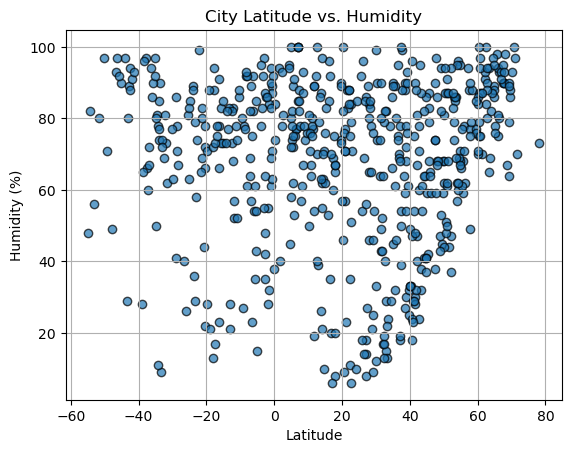

In [45]:
# Build scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Set title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\jahn_\\Documents\\UofT\\GitHub\\Data-Analytics-Boot-Camp\\Module_6_API_Challenge\\Output_data\\Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

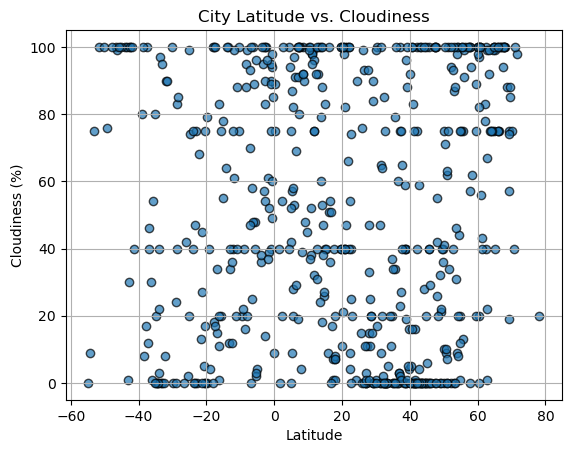

In [47]:
# Build scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Set title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\jahn_\\Documents\\UofT\\GitHub\\Data-Analytics-Boot-Camp\\Module_6_API_Challenge\\Output_data\\Fig3.png")

# Show the plot
plt.show()





#### Latitude vs. Wind Speed Plot

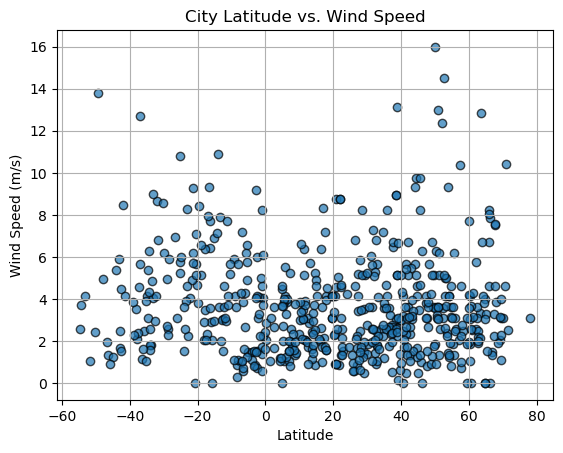

In [49]:
# Build scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Set title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\jahn_\\Documents\\UofT\\GitHub\\Data-Analytics-Boot-Camp\\Module_6_API_Challenge\\Output_data\\Fig4.png")

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line values
    regress_values = x_values * slope + intercept
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", alpha=1, label="Data Points")
    
    # Create the regression line plot
    plt.plot(x_values, regress_values, "r-", label=f"Regression Line (R² = {round(rvalue**2, 2)})")
  
    # Set title and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Display the regression equation (y-value) on the plot in red
    equation_text = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(equation_text, (min(x_values), min(y_values) + 5), fontsize=14, color="red")
    



In [111]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,prince rupert,54.3161,-130.3201,12.05,96,100,4.12,CA,1695835399
1,jiuquan,39.7432,98.5174,14.29,25,4,3.01,CN,1695835400
3,yeraliyev,43.2000,51.6500,21.07,38,0,3.05,KZ,1695835401
6,beihai,21.4833,109.1000,26.69,88,100,5.05,CN,1695835402
7,enewetak,11.3474,162.3373,28.62,77,99,6.37,MH,1695835402


###  Temperature vs. Latitude Linear Regression Plot

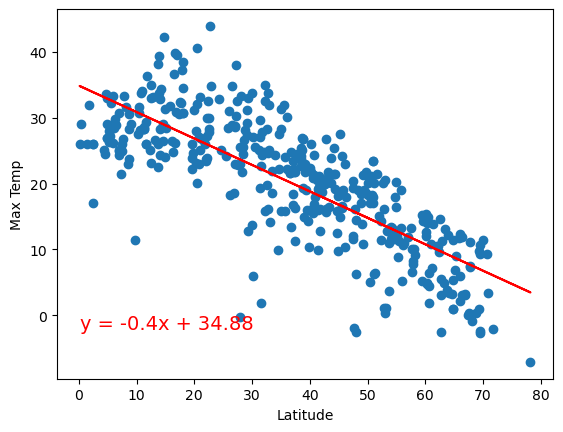

In [112]:
# Linear regression on Northern Hemisphere - Latitude vs. Max Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"

# Call the function to create and display the regression plot
plot_linear_regression(x_values, y_values, x_label, y_label, title, filename)  

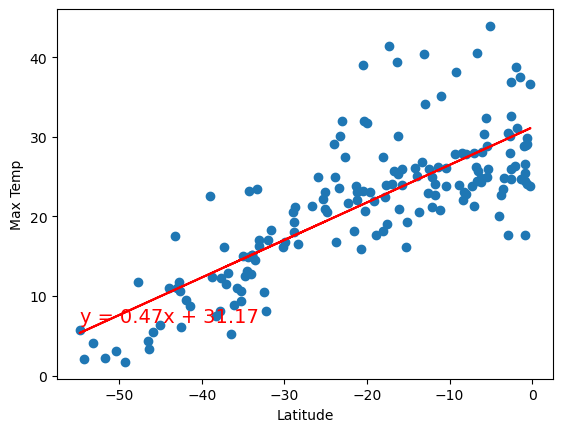

In [115]:
# Filter data for Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Linear regression on Southern Hemisphere - Latitude vs. Max Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
title = "Southern Hemisphere - Latitude vs. Max Temperature"
filename = "output_data/Southern_Hemi_Latitude_vs_Max_Temp.png"

# Call the function to create and display the regression plot
plot_linear_regression(x_values, y_values, x_label, y_label, title, filename)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


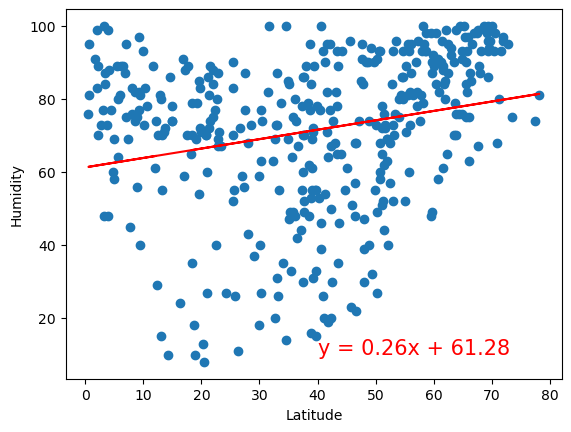

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


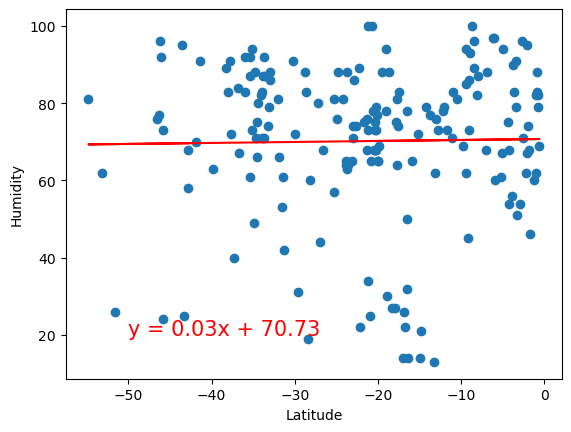

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


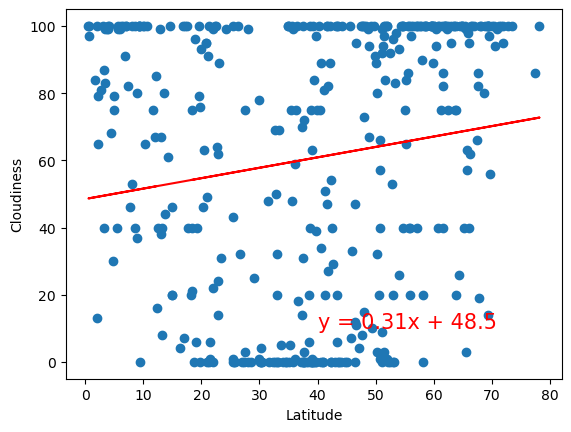

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


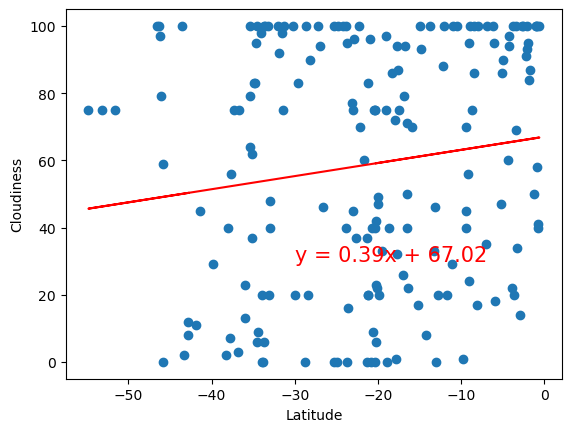

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


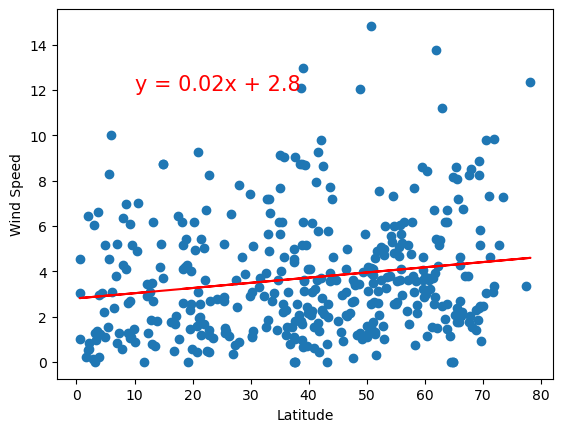

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


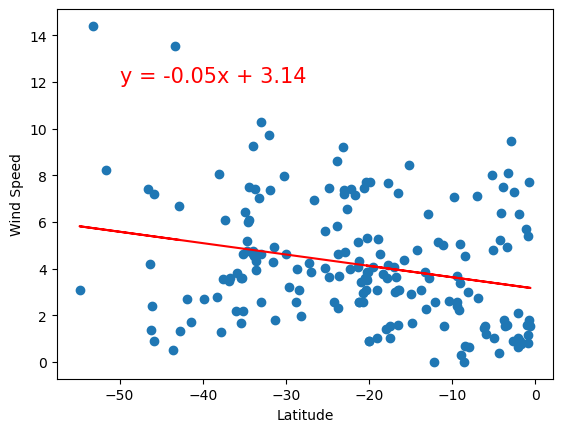

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE